In [1]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
#sns.set()
#source: MTA files from http://web.mta.info/developers/turnstile.html

def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs) #this will handle duplicate headers
        
week_nums = [180407] #,180414, 180421, 180428, 180505, 180512, 
#             180519, 180526, 180602, 180609, 180616, 180623, 180630]

#challenge 1
turnstiles_df = get_data(week_nums)

In [2]:
turnstiles_df.to_csv("merged.csv", index = False)

In [3]:
#strip spaces
turnstiles_df = turnstiles_df.rename(columns=lambda x: x.strip())
#or: turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [4]:
#challenge 2
#Create a new column that stores the date and time as a single pandas datetime object

turnstiles_df['DateTime'] = turnstiles_df['DATE'] + turnstiles_df['TIME']
turnstiles_df['DateTime'] = pd.to_datetime(turnstiles_df['DateTime'], format='%m/%d/%Y%H:%M:%S')

In [25]:
#challenge 3
'''
These counts are for every n hours (What is n?). 
Also, there's something odd about these "counts", what is it?
'''
#from documentation:

'''
DESc     = Represent the “REGULAR” scheduled audit event (Normally occurs every 4 hours)
          1. Audits may occur more that 4 hours due to planning, or troubleshooting activities.
          2. Additionally, there may be a “RECOVR AUD” entry: This refers to a missed audit that was recovered. 

ENTRIES  = The comulative entry register value for a device
EXIST    = The cumulative exit register value for a device
'''

#n = 4hrs
#counts are cumulative

'''Do they actually represent total entries for a time period, or something else?'''

#We can tell that cumulative data is captured every 4hrs by the MTA documentation 
#so we can take the delta between measurements to determine counts over an interval.

"""We want total daily entries, create a new dataframe with one row per turnstile/day and a column that gives total daily entries."""

turnstiles_df = turnstiles_df.sort_values(by=['C/A','UNIT','SCP', 'STATION','DateTime'])
turnstiles_df['Daily_Entries'] = turnstiles_df['ENTRIES'] - turnstiles_df['ENTRIES'].shift(1)
df_turnstile_per_day = turnstiles_df.groupby(['C/A','UNIT','SCP', 'STATION','DATE'])[['Daily_Entries']].sum().reset_index()   #retains row label

#this is for challenge no. 5
df_turnstile_no_scp = turnstiles_df.groupby(['C/A','UNIT', 'STATION','DATE'])[['Daily_Entries']].sum().reset_index()




In [26]:
df_turnstile_per_day.tail(200)

,C/A,UNIT,SCP,STATION,DATE,Daily_Entries
32725,S101,R070,00-03-02,ST. GEORGE,04/03/2018,679.0
32726,S101,R070,00-03-02,ST. GEORGE,04/04/2018,628.0
32727,S101,R070,00-03-02,ST. GEORGE,04/05/2018,679.0
32728,S101,R070,00-03-02,ST. GEORGE,04/06/2018,601.0
32729,S101,R070,00-03-03,ST. GEORGE,03/31/2018,173118.0
32730,S101,R070,00-03-03,ST. GEORGE,04/01/2018,203.0
32731,S101,R070,00-03-03,ST. GEORGE,04/02/2018,641.0
32732,S101,R070,00-03-03,ST. GEORGE,04/03/2018,822.0
32733,S101,R070,00-03-03,ST. GEORGE,04/04/2018,745.0
32734,S101,R070,00-03-03,ST. GEORGE,04/05/2018,804.0


In [7]:
#make all negative positive
df_turnstile_per_day['Daily_Entries_abs'] = df_turnstile_per_day['Daily_Entries'].abs()

#remove large numbers

def replace(group):
    upper = 500000
    outliers = group > upper
    group[outliers] = np.nan
    return group

df_turnstile_per_day['Daily_Entries_abs'] = df_turnstile_per_day['Daily_Entries_abs'].transform(replace)

#fill nan
df_turnstile_per_day['Daily_Entries_abs'].fillna(method = 'ffill', inplace = True)

/Users/clarencestephen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


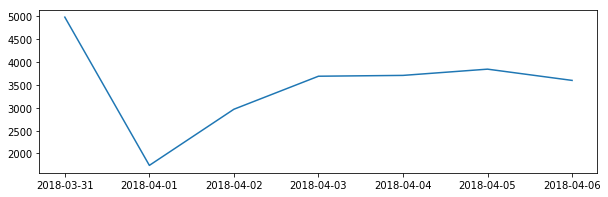

In [8]:
'''
Challenge 4
We will plot the daily time series for a turnstile.
Extract a list of dates and a list of counts from the dataframe, dates and counts. 
This should plot it:
'''

df_turnstile_per_day["DATE"] = pd.to_datetime(df_turnstile_per_day['DATE'])

mask = ((df_turnstile_per_day["C/A"] == "A011") & 
(df_turnstile_per_day["UNIT"] == "R080") & 
(df_turnstile_per_day["SCP"] == "01-00-00") & 
(df_turnstile_per_day["STATION"] == "57 ST-7 AV"))

dfnew = df_turnstile_per_day[mask]

dates = [i for i in dfnew['DATE']]
counts = [i for i in dfnew['Daily_Entries_abs']]

plt.figure(figsize=(10,3))
plt.plot(dates,counts)

In [24]:
"""Challenge 5: For each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo."""

'Challenge 5: For each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.'

In [27]:
df_turnstile_no_scp.head(100)  #did this earlier on uncleaned data for challenge question

,C/A,UNIT,STATION,DATE,Daily_Entries
0,A002,R051,59 ST,03/31/2018,821831.0
1,A002,R051,59 ST,04/01/2018,0.0
2,A002,R051,59 ST,04/02/2018,9783.0
3,A002,R051,59 ST,04/03/2018,12757.0
4,A002,R051,59 ST,04/04/2018,12862.0
5,A002,R051,59 ST,04/05/2018,13329.0
6,A002,R051,59 ST,04/06/2018,12753.0
7,A006,R079,5 AV/59 ST,03/31/2018,7353041.0
8,A006,R079,5 AV/59 ST,04/01/2018,0.0
9,A006,R079,5 AV/59 ST,04/02/2018,9562.0


In [9]:
"""
Challenge 6
Similarly, combine everything in each station, and come up with a time series of [(date1, count1),(date2,count2),...] 
type of time series for each STATION, by adding up all the turnstiles in a station
"""
df_station_per_day = df_turnstile_per_day.groupby(['STATION','DATE'])[['Daily_Entries_abs']].sum().reset_index()   #retains row label
df_station_per_day.head(100)

,STATION,DATE,Daily_Entries_abs
0,1 AV,2018-03-31,18825.0
1,1 AV,2018-04-01,13367.0
2,1 AV,2018-04-02,17830.0
3,1 AV,2018-04-03,19463.0
4,1 AV,2018-04-04,20295.0
5,1 AV,2018-04-05,20759.0
6,1 AV,2018-04-06,21637.0
7,103 ST,2018-03-31,29990.0
8,103 ST,2018-04-01,13058.0
9,103 ST,2018-04-02,25155.0


,STATION,DATE,Daily_Entries_abs
1604,GRD CNTRL-42 ST,2018-04-01,50761.0
1605,GRD CNTRL-42 ST,2018-04-02,143327.0
1606,GRD CNTRL-42 ST,2018-04-03,167650.0
1607,GRD CNTRL-42 ST,2018-04-04,160884.0
1608,GRD CNTRL-42 ST,2018-04-05,163524.0
1609,GRD CNTRL-42 ST,2018-04-06,149215.0


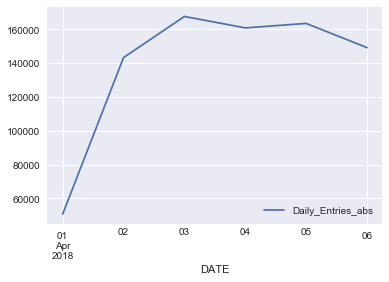

In [10]:
"""
Challenge 7
Plot the time series for a station.
"""
                                                          
sns.set() #I don't want to rerun the first cell....

df_grandcentral = df_station_per_day[df_station_per_day['STATION'] == 'GRD CNTRL-42 ST']
df_grandcentral = df_grandcentral[df_grandcentral['Daily_Entries_abs'] < 500000 ] #filter outliers
df_grandcentral["DATE"] = pd.to_datetime(df_grandcentral['DATE'])

df_grandcentral.plot(x = 'DATE', y = 'Daily_Entries_abs')
df_grandcentral.head(20)

In [11]:
'''Challenge 8
Make one list of counts for one week for one station. 
Monday's count, Tuesday's count, etc. so it's a list of 7 counts. 
Make the same list for another week, and another week, and another week. 
plt.plot(week_count_list) for every week_count_list you created this way. 
You should get a rainbow plot of weekly commute numbers on top of each other.
'''

df_grandcentral['weeknum'] = df_grandcentral["DATE"].dt.week
df_grandcentral['daynum'] = df_grandcentral["DATE"].dt.day
gct_days_weeks = df_grandcentral.groupby(['weeknum','daynum'])[['Daily_Entries_abs']].sum().reset_index()   #retains row label
gct_days_weeks.head(100)

,weeknum,daynum,Daily_Entries_abs
0,13,1,50761.0
1,14,2,143327.0
2,14,3,167650.0
3,14,4,160884.0
4,14,5,163524.0
5,14,6,149215.0


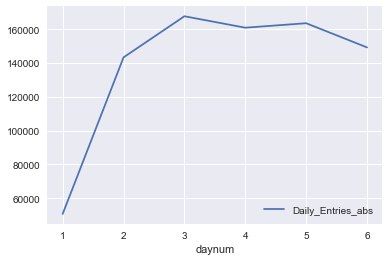

In [12]:
gct_days_weeks.plot(x = 'daynum', y = 'Daily_Entries_abs')

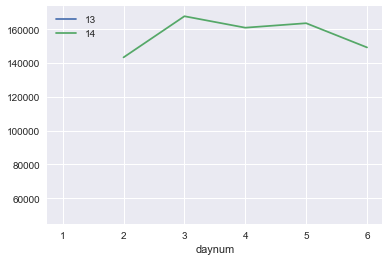

In [13]:
fig, ax = plt.subplots()
for name, group in gct_days_weeks.groupby(['weeknum']):
    group.plot('daynum', y='Daily_Entries_abs', ax=ax, label=name)


In [15]:
#Challenge 9 stations by volume

stations_daily = (df_station_per_day.groupby(['STATION','DATE'])['Daily_Entries_abs'].sum().reset_index())  
stations_daily.head()

,STATION,DATE,Daily_Entries_abs
0,1 AV,2018-03-31,18825.0
1,1 AV,2018-04-01,13367.0
2,1 AV,2018-04-02,17830.0
3,1 AV,2018-04-03,19463.0
4,1 AV,2018-04-04,20295.0


In [16]:
# then get top 10 stations over multiple weeks (all the data here)

top_stations = \
    (stations_daily.groupby(['STATION'])['Daily_Entries_abs'].sum()
                   .reset_index()
                   .sort_values(by='Daily_Entries_abs',ascending=False) 
                   )

top10_stations = top_stations.head(10)
top10_stations
top_stations

,STATION,Daily_Entries_abs
222,FULTON ST,8999743.0
274,METS-WILLETS PT,4874000.0
309,PATH NEW WTC,4093552.0
231,GROVE STREET,3936501.0
45,23 ST,3701295.0
263,LACKAWANNA,3145580.0
122,ATL AV-BARCLAY,3030738.0
82,59 ST,2902301.0
83,59 ST COLUMBUS,2847269.0
209,EXCHANGE PLACE,2787282.0


In [22]:
'''Challenge 10: Make a single list of these total ridership values and plot it with plt.hist(total_ridership_counts)''' 

'Challenge 10: Make a single list of these total ridership values and plot it with plt.hist(total_ridership_counts)'

(array([301.,  48.,  12.,   6.,   3.,   1.,   0.,   0.,   0.,   1.]),
 array([1.7450000e+03, 9.0154480e+05, 1.8013446e+06, 2.7011444e+06,
        3.6009442e+06, 4.5007440e+06, 5.4005438e+06, 6.3003436e+06,
        7.2001434e+06, 8.0999432e+06, 8.9997430e+06]),
 <a list of 10 Patch objects>)

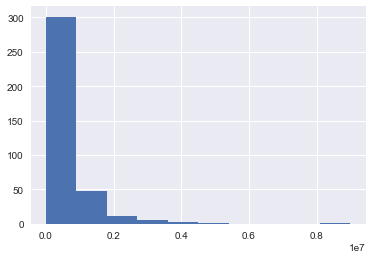

In [18]:
total_ridership_counts = [i for i in top_stations['Daily_Entries_abs']]
plt.hist(total_ridership_counts)